In [16]:
import time

# print(f'Notebook First Created: {time.asctime()}') #commented...don't run code agin

Notebook Last Updated: Sat Jan 20 11:48:22 2024


In [20]:
import time

print(f'Notebook Last Updated: {time.asctime()}')

Notebook Last Updated: Sat Jan 20 12:49:39 2024


# Heart Attack Prediction AI 🤖


**Introduction:**

- **Objective 🎯:** Develop an AI system for early heart attack detection, a crucial component of our larger Heart Attack Detection and Assistance System.

- **Technology 💻:** Leveraging scikit-learn (sklearn) for machine learning model development.

- **Process 🔄:**
  1. **Data Collection 📊:** Gather relevant data sources for training and testing.
  
  2. **Data Cleaning 🧹:** Prepare the dataset by handling missing values, outliers, and ensuring data quality.

  3. **Exploratory Data Analysis (EDA) 📊:** Gain insights into the cleaned dataset, understanding its nuances and patterns.

  4. **Feature Engineering 🛠️:** Create new informative features or transform existing ones to enhance model performance.

  5. **Model Building 🛠️:** Utilize various machine learning algorithms to build predictive models.

  6. **Evaluation 📈:** Rigorously assess model performance using diverse metrics.

  7. **Model Selection 🎉:** Identify the most effective model for heart attack detection.

  8. **Hyperparameter Tuning ⚙️:** Refine chosen model for optimal performance.

  9. **Model-Driven EDA 🧠:** Utilize model insights to enhance understanding of the dataset.

  10. **Deployment 🚀:** Implement the trained model into a production environment for real-world application.

- **Integration 🔗:** Seamlessly integrate the developed AI system with the main project using the Hugging Face API.

In [3]:
# data manipulation
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# metrics and model information goes here 



## Exploratory Data Analysis 


**EDA (Exploratory Data Analysis) Checklist:**

1. **Initial Data Exploration:**
   - Find head, tail, and a sample of the dataset for a quick overview. **Complete ✅**

2. **Data Cleaning:**
   - Remove NaN (Not a Number) values.
   - Eliminate duplicate data for improved accuracy. **Complete ✅**

3. **Outlier Detection:**
   - Utilize box plots for each parameter to identify and visualize outliers. **[Pending]**

4. **Correlation Analysis:**
   - Construct a correlation matrix to understand relationships between different variables. **[Pending]**

5. **Dataset Characteristics:**
   - Determine the size of the dataset.
   - Explore the shape of the dataset (rows, columns). **Complete ✅**

6. **Assumptions and Testing:**
   - Formulate assumptions about the model and its parameters.
   - Test assumptions through visualizations and statistical methods. **[Pending]**

7. **Normalization:**
   - Normalize data if necessary for better model performance. **[Pending]**

8. **Additional Analysis (if needed):**
   - Perform statistical tests on relevant parameters.
   - Plot each parameter against others to explore relationships.
   - Plot each parameter against the target variable for insights. **[Pending]**

9. **Documentation:**
   - Document findings, observations, and any decisions made during the EDA process.
   - Record insights that may influence model building and feature selection. **[Pending]**

10. **Plotting:**
    - Generate visual representations (histograms, scatter plots, etc.) to aid in understanding the distribution of data.
    - Plot each parameter against others to explore relationships.
    - Plot each parameter against the target variable for insights. **[Partial 🧩]**

11. **Review and Iterate:**
    - Review the EDA results and iterate if needed based on the insights gained. **[Pending]**


   
*adapted from: Warmbein, Karen. “An EDA Checklist - DataSeries - Medium.” Medium, 14 Dec. 2021, medium.com/dataseries/an-eda-checklist-800beeaee555.*

In [5]:
df = pd.read_csv('dataset/heart.csv')

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# data doesn't have missing values therefore NaN removal is not necessary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# there are a lot more men there are women, there are a lot more middle aged patients than there are youngsters or older patients (let's see if this holds true at the time of plotting)

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


In [11]:
# checking the shape of the dataset
# dataset has 304 samples with 14 parameters each
df.shape


(303, 14)

In [21]:
#identification of duplicated rows
duplicate_rows_params=df[df.duplicated()]

In [22]:
duplicate_filtered_df = df[
    (df['age'] == duplicate_rows_params['age'].iloc[0]) &
    (df['sex'] == duplicate_rows_params['sex'].iloc[0]) &
    (df['cp'] == duplicate_rows_params['cp'].iloc[0]) &
    (df['trtbps'] == duplicate_rows_params['trtbps'].iloc[0]) &
    (df['chol'] == duplicate_rows_params['chol'].iloc[0]) &
    (df['fbs'] == duplicate_rows_params['fbs'].iloc[0]) &
    (df['restecg'] == duplicate_rows_params['restecg'].iloc[0]) &
    (df['thalachh'] == duplicate_rows_params['thalachh'].iloc[0]) &
    (df['oldpeak'] == duplicate_rows_params['oldpeak'].iloc[0]) &
    (df['slp'] == duplicate_rows_params['slp'].iloc[0]) &
    (df['caa'] == duplicate_rows_params['caa'].iloc[0]) &
    (df['thall'] == duplicate_rows_params['thall'].iloc[0]) &
    (df['exng'] == duplicate_rows_params['exng'].iloc[0]) &
    (df['output'] == duplicate_rows_params['output'].iloc[0])
]



In [23]:
# we find that there are two rows which are duplicated 

duplicate_filtered_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [24]:
df.drop_duplicates(inplace = True)

In [25]:
len(df.output.value_counts())

2

Text(0.5, 1.0, 'Number of Individuals with and without Heart Attack')

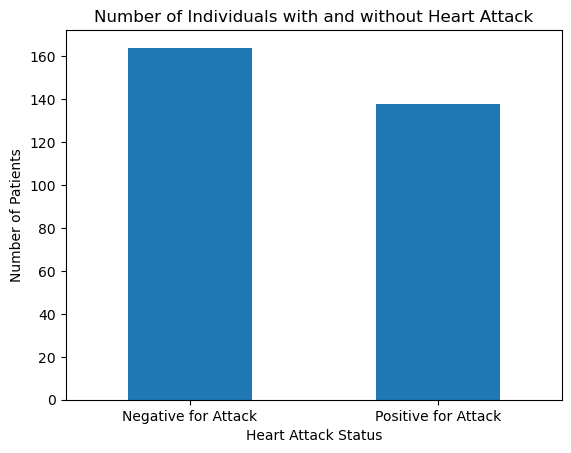

In [26]:
# dataset very balanced --> nearly equal samples of with and without heart disease which removes bias

df.output.value_counts().plot(kind = 'bar')

plt.xticks(range(len(df.output.value_counts())), ['Negative for Attack', 'Positive for Attack'], rotation = 360)
plt.ylabel('Number of Patients')
plt.xlabel('Heart Attack Status')
plt.title('Number of patients')
plt.title('Number of Individuals with and without Heart Attack')
# plt.savefig('visualisations/output_v_freq.jpeg') # COMMENTED TO REMOVE SAVE AT RUNTIME

Text(0.5, 1.0, 'Number of Individuals with and without Heart Attack by Gender')

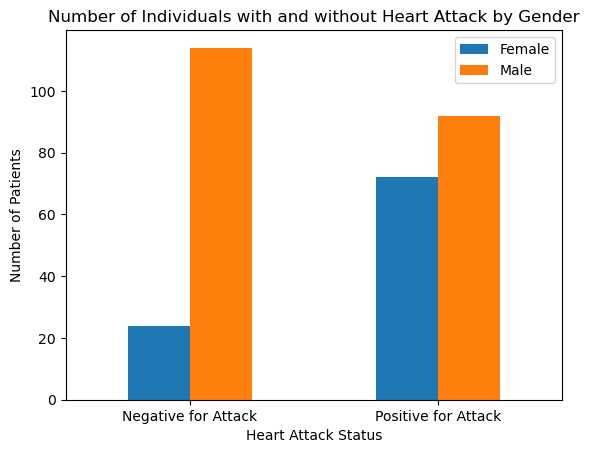

In [27]:
# there are a lot more males than there are females....in addition to this, the proportion of females that have heart disease is much higher...this may bias the results of our model

cross_tab = pd.crosstab(df.output, df.sex)
cross_tab.plot(kind='bar')
plt.legend(labels=['Female', 'Male'])
custom_ticks = range(len(cross_tab.columns))
plt.xticks(custom_ticks, ['Negative for Attack', 'Positive for Attack'], rotation = 360)
plt.ylabel('Number of Patients')
plt.xlabel('Heart Attack Status')
plt.title('Number of Individuals with and without Heart Attack by Gender')

# plt.savefig('visualisations/output_v_sex.jpeg') # COMMENTED TO REMOVE SAVE AT RUNTIME

In [28]:
def createAgeBins(min_size, max_size, bin_size=5, string_form=False):
    """
    Create age bins based on specified parameters.

    Parameters:
    - min_size (int): The minimum age to start creating bins.
    - max_size (int): The maximum age to include in the bins.
    - bin_size (int, optional): The size of each age bin. Default is 5.
    - string_form (bool, optional): If True, returns age bins as strings. Default is False.

    Returns:
    list: A list of lists representing age bins in the format [start_age, end_age].
          If string_form is True, returns age bins in the format "start_age - end_age".

    Example:
    >>> createAgeBins(20, 40, 10)
    [[20, 30], [31, 40]]

    If string_form is True:
    >>> createAgeBins(20, 40, 10, string_form=True)
    ['20-30', '31-40']

    Note:
    - The age bins are inclusive on both the lower end and the upper end
    - The function assumes that min_size and max_size are non-negative integers.
    """
    output = []
    min_size -= 1
    while min_size <= max_size:
        output.append([min_size + 1, min_size + bin_size])
        min_size += bin_size
    if string_form:
        return [f"{item[0]}-{item[1]}" for item in output]
    else:
        return output

# creating age boundaries
age_bins=createAgeBins(29, 77, 5)

In [29]:
target_distrib_age = []
for index, item in enumerate(age_bins):
    print(item)
    filtr_df = df[(df['age'] >= item[0]) & (df['age'] <=item[1])]
    target_distrib_age.append([filtr_df['output'].eq(1).sum(), filtr_df['output'].eq(0).sum()])

[29, 33]
[34, 38]
[39, 43]
[44, 48]
[49, 53]
[54, 58]
[59, 63]
[64, 68]
[69, 73]
[74, 78]


In [30]:
target_distrib_age


[[1, 0],
 [7, 3],
 [25, 8],
 [25, 13],
 [31, 14],
 [32, 39],
 [16, 37],
 [19, 19],
 [6, 4],
 [2, 1]]

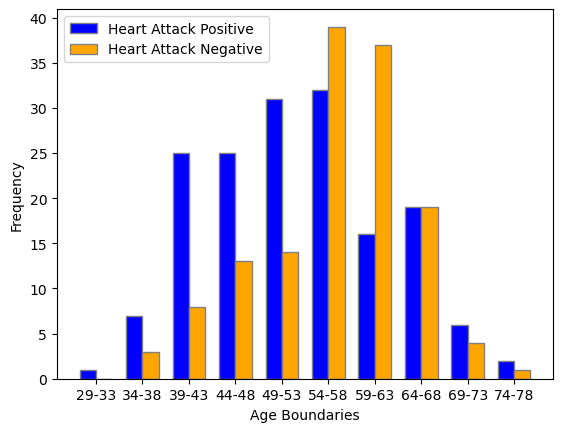

In [31]:
# the data is concentrated mostly around middle aged people with little to no representation of people of higher and lower ages

# plotting age boundaries and 
# Sample data for illustration
age_bins_string = createAgeBins(29, 77, 5, string_form=True)



# Width of each bar
bar_width = 0.35

# Set the positions for the bars on the x-axis
r1 = np.arange(len(age_bins_string))
r2 = [x + bar_width for x in r1]

# Plot the bars
plt.bar(r1, [item[0] for item in target_distrib_age], color='blue', width=bar_width, edgecolor='grey', label='Heart Attack Positive')
plt.bar(r2, [item[1] for item in target_distrib_age], color='orange', width=bar_width, edgecolor='grey', label='Heart Attack Negative')

# Add x-axis age_bins_string and labels
plt.xlabel('Age Boundaries')
plt.xticks([r + bar_width/2 for r in range(len(age_bins_string))], age_bins_string)

# Add y-axis label
plt.ylabel('Frequency')

# Add legend
plt.legend()


# plt.savefig('visualisations/output_v_age.jpeg') # commented to remove save at runtime


Text(0.5, 1.0, 'Number of Individuals with and without Heart Attack by Chest pain Type')

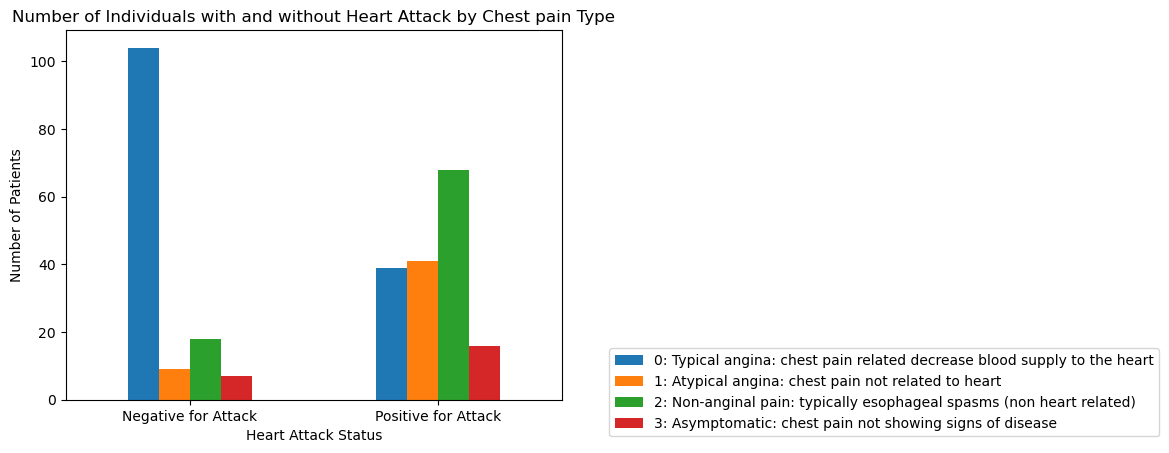

In [32]:
# chest pain related to the non-anginal pain seems to be having the highest proportion of patients positive for heart attack

cross_tab = pd.crosstab(df.output, df.cp)
cross_tab.plot(kind='bar')


plt.legend(labels=['0: Typical angina: chest pain related decrease blood supply to the heart', '1: Atypical angina: chest pain not related to heart','2: Non-anginal pain: typically esophageal spasms (non heart related)', '3: Asymptomatic: chest pain not showing signs of disease'], loc='center', bbox_to_anchor=(1.65, 0.02))

custom_ticks = range(len(cross_tab))
plt.xticks(custom_ticks, ['Negative for Attack', 'Positive for Attack'], rotation = 360)
plt.ylabel('Number of Patients')
plt.xlabel('Heart Attack Status')
plt.title('Number of Individuals with and without Heart Attack by Chest pain Type')

# plt.savefig('visualisations/output_v_cp.jpeg')# commented to remove save during run-time


Text(0.5, 0, 'Resting Blood Pressure (in mm Hg)')

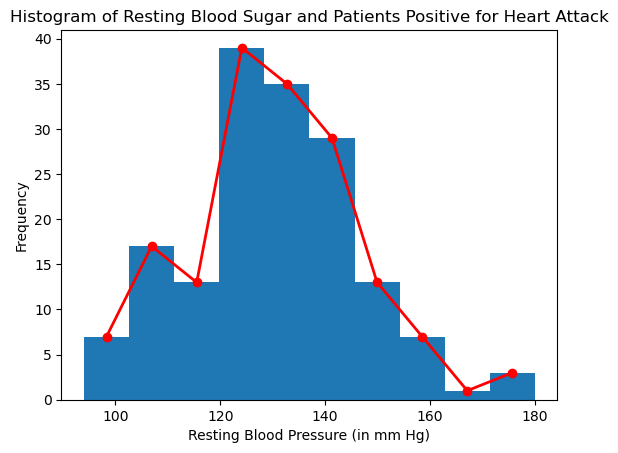

In [33]:
# histogram of people positive for heart attack and trtbps

#most testing positive for heart attack people have a trtbps of 140 - 150  

data_trtbps = df[(df['output'] == 1)].trtbps

data_trtbps.plot(kind = 'hist', bins =10)

hist, bins = np.histogram(data_trtbps, bins=10)

# Calculate bin widths and centers
bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2

# Plot the histogram as a line plot
plt.plot(bin_centers, hist, color='red', linewidth=2, marker = 'o')


plt.title('Histogram of Resting Blood Sugar and Patients Positive for Heart Attack')
plt.xlabel('Resting Blood Pressure (in mm Hg)')

# plt.savefig('visualisations/output_v_trtbps.jpeg') # commented to remove repeated at run time of notebook


Text(0.5, 0, 'Serum Cholestrol in mg/dl')

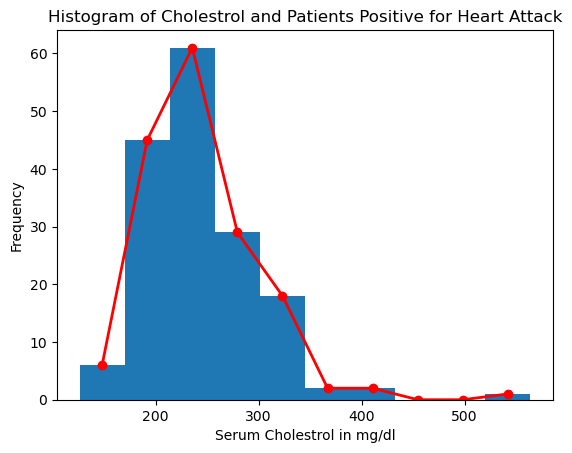

In [34]:
# # histogram of people positive for heart attack and chol

# most people positive for heart attack have cholestrol level of 200.....the hisotgram has a shift to the left

data_chol = df[(df['output'] == 1)].chol

data_chol.plot(kind = 'hist', bins =10)

hist, bins = np.histogram(data_chol, bins=10)

# Calculate bin widths and centers
bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2

# Plot the histogram as a line plot
plt.plot(bin_centers, hist, color='red', linewidth=2, marker = 'o')


plt.title('Histogram of Cholestrol and Patients Positive for Heart Attack')
plt.xlabel('Serum Cholestrol in mg/dl')

# plt.savefig('visualisations/output_v_chol.jpeg') # commented to remove repeated at run time of notebook
